# importing the basic libraries

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split 
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report 

# Loading the dataset 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/Insurance Dataset.csv")
data

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,New York City,Bronx,1169.0,70 or Older,F,Other Race,Spanish/Hispanic,6,Emergency,Skilled Nursing Home,106,29,Cardiac arrhythmia & conduction disorders,2,3.0,Medical,0,N,Y,69650.41,13896.82,0.199522,1,3
1048571,New York City,Bronx,1169.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Emergency,Home or Self Care,8,231,Other infectious & parasitic diseases,2,1.0,Medical,0,N,N,13587.38,3918.35,0.288382,1,3
1048572,New York City,Bronx,1169.0,50 to 69,M,Other Race,Spanish/Hispanic,13,Emergency,Medicare Cert Long Term Care Hospital,151,88,Hepatic coma & other major acute liver disorders,4,4.0,Medical,0,N,Y,104629.78,24746.64,0.236516,0,3
1048573,New York City,Bronx,1169.0,30 to 49,F,Black/African American,Not Span/Hispanic,2,Emergency,Home or Self Care,143,86,"Inguinal, femoral & umbilical hernia procedures",1,1.0,Surgical,0,N,Y,27521.41,6766.04,0.245846,1,3


In [6]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data1=data.copy()

In [7]:
data1.head(10)

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
0,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,4,Elective,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,5511.95,5582.49,1.012798,1,1
1,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,4,Urgent,Short-term Hospital,197,0,Cellulitis & other skin infections,3,2.0,Medical,0,N,Y,4783.20,5162.82,1.079365,1,1
2,Western NY,Allegany,37.0,30 to 49,F,White,Not Span/Hispanic,3,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,3829.15,4056.52,1.059379,1,1
3,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Urgent,Home or Self Care,122,0,Other pneumonia,1,1.0,Medical,0,N,Y,1108.20,1644.75,1.484167,0,1
4,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,3.0,Medical,0,N,Y,3418.18,3370.87,0.986161,1,1
5,Western NY,Allegany,37.0,0 to 17,F,White,Not Span/Hispanic,1,Elective,Home or Self Care,142,0,Other digestive system diagnoses,1,1.0,Medical,0,N,Y,1386.10,1919.46,1.384794,1,1
6,Western NY,Allegany,37.0,18 to 29,M,White,Not Span/Hispanic,3,Elective,Home or Self Care,122,0,Other pneumonia,2,1.0,Medical,0,N,Y,3373.10,3597.63,1.066565,1,1
7,Western NY,Allegany,37.0,70 or Older,F,White,Not Span/Hispanic,1,Elective,Home or Self Care,154,202,"Other gastroenteritis, nausa & vomiting",2,3.0,Medical,0,N,Y,1190.75,1632.70,1.371150,1,1
8,Western NY,Allegany,37.0,0 to 17,M,White,Not Span/Hispanic,1,Elective,Home or Self Care,125,0,Bronchiolitis & RSV pneumonia,1,1.0,Medical,0,N,N,528.04,596.04,1.128782,1,1
9,Western NY,Allegany,37.0,50 to 69,M,White,Not Span/Hispanic,2,Elective,Home or Self Care,122,0,Other pneumonia,2,1.0,Medical,0,N,Y,2661.61,2901.41,1.090095,0,1


# Fill nan values with mode value

In [8]:
data1["Area_Service"].fillna('Hudson Valley',inplace=True) # data['Area_Service'].mode() = Hudson Valley
data1["Hospital Id"].fillna(413.0,inplace=True) # data['Hospital Id'].mode() = 413.0
data1["Hospital County"].fillna('Erie',inplace=True) # data['Hospital County'].mode() = Erie
data1["Mortality risk"].fillna(1.0,inplace=True) # data['Mortality risk'].mode() = 1.0

In [9]:
data1.isna().sum() # it is clear that the data is cleaned

Area_Service                             0
Hospital County                          0
Hospital Id                              0
Age                                      0
Gender                                   0
Cultural_group                           0
ethnicity                                0
Days_spend_hsptl                         0
Admission_type                           0
Home or self care,                       0
ccs_diagnosis_code                       0
ccs_procedure_code                       0
apr_drg_description                      0
Code_illness                             0
Mortality risk                           0
Surg_Description                         0
Weight_baby                              0
Abortion                                 0
Emergency dept_yes/No                    0
Tot_charg                                0
Tot_cost                                 0
ratio_of_total_costs_to_total_charges    0
Result                                   0
Payment_Typ

# Checking for duplicte rows

In [10]:
#Print the duplicated rows
data1[data1.duplicated()]

,Area_Service,Hospital County,Hospital Id,Age,Gender,Cultural_group,ethnicity,Days_spend_hsptl,Admission_type,"Home or self care,",ccs_diagnosis_code,ccs_procedure_code,apr_drg_description,Code_illness,Mortality risk,Surg_Description,Weight_baby,Abortion,Emergency dept_yes/No,Tot_charg,Tot_cost,ratio_of_total_costs_to_total_charges,Result,Payment_Typology
1125,Western NY,Allegany,39.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3700,N,N,1678.75,737.21,0.439141,1,1
3086,Western NY,Cattaraugus,66.0,0 to 17,M,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,115,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,3600,N,N,1251.50,829.70,0.662961,0,1
3226,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4209,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2700,N,N,1150.50,788.65,0.685486,1,1
4234,Western NY,Cattaraugus,66.0,0 to 17,F,White,Not Span/Hispanic,2,Newborn,Home or Self Care,218,0,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2800,N,N,1150.50,788.65,0.685486,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015327,New York City,Bronx,1168.0,0 to 17,F,Other Race,Not Span/Hispanic,2,Newborn,Home or Self Care,218,228,"Neonate birthwt >2499g, normal newborn or neon...",1,1.0,Medical,2900,N,N,5955.85,1303.62,0.218881,1,3
1025529,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3
1028997,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,1,1.0,Medical,0,N,N,12557.00,2963.40,0.235996,1,2
1035973,New York City,Bronx,1169.0,0 to 17,F,Other Race,Spanish/Hispanic,2,Elective,Home or Self Care,83,227,Seizure,2,1.0,Medical,0,N,N,12500.00,2960.11,0.236809,1,3


In [11]:
#Count of duplicated rows
data[data.duplicated()].shape

(4814, 24)

In [12]:
data_cleaned=data1.drop_duplicates()

In [13]:
data_cleaned.shape

(1043761, 24)

In [14]:
len(data_cleaned['Days_spend_hsptl'].unique())

120

In [15]:
data_cleaned['Days_spend_hsptl'].unique()

array(['4', '3', '1', '2', '5', '6', '14', '12', '9', '8', '10', '7',
       '22', '11', '16', '15', '25', '13', '17', '28', '18', '19', '23',
       '38', '20', '24', '26', '21', '27', '30', '29', '39', '87', '35',
       '37', '32', '55', '56', '49', '110', '69', '75', '42', '51', '47',
       '45', '46', '40', '34', '79', '43', '120 +', '65', '41', '31',
       '50', '59', '44', '36', '70', '115', '58', '94', '33', '68', '67',
       '54', '80', '85', '95', '78', '91', '88', '48', '52', '63', '57',
       '74', '64', '53', '62', '97', '72', '118', '81', '90', '86', '106',
       '112', '105', '114', '66', '89', '83', '84', '82', '93', '116',
       '71', '60', '73', '61', '92', '76', '96', '77', '104', '100',
       '103', '102', '117', '108', '99', '107', '98', '101', '119', '111',
       '109', '113'], dtype=object)

In [16]:
data_cleaned['Days_spend_hsptl'].replace(to_replace='120 +',value='121',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [17]:
data_cleaned['Days_spend_hsptl']=data_cleaned['Days_spend_hsptl'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
data_cleaned['Days_spend_hsptl'].unique()

array([  4,   3,   1,   2,   5,   6,  14,  12,   9,   8,  10,   7,  22,
        11,  16,  15,  25,  13,  17,  28,  18,  19,  23,  38,  20,  24,
        26,  21,  27,  30,  29,  39,  87,  35,  37,  32,  55,  56,  49,
       110,  69,  75,  42,  51,  47,  45,  46,  40,  34,  79,  43, 121,
        65,  41,  31,  50,  59,  44,  36,  70, 115,  58,  94,  33,  68,
        67,  54,  80,  85,  95,  78,  91,  88,  48,  52,  63,  57,  74,
        64,  53,  62,  97,  72, 118,  81,  90,  86, 106, 112, 105, 114,
        66,  89,  83,  84,  82,  93, 116,  71,  60,  73,  61,  92,  76,
        96,  77, 104, 100, 103, 102, 117, 108,  99, 107,  98, 101, 119,
       111, 109, 113])

In [19]:
Q1 = data_cleaned.quantile(0.25)
Q3 = data_cleaned.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hospital Id                                764.000000
Days_spend_hsptl                             4.000000
ccs_diagnosis_code                         110.000000
ccs_procedure_code                         172.000000
Code_illness                                 2.000000
Mortality risk                               2.000000
Weight_baby                                  0.000000
Tot_charg                                21768.750000
Tot_cost                                  8115.200000
ratio_of_total_costs_to_total_charges        0.205405
Result                                       1.000000
Payment_Typology                             2.000000
dtype: float64


In [20]:
data_cleaned = data_cleaned[~((data_cleaned < (Q1 - 1.5 * IQR)) |(data_cleaned > (Q3 + 1.5 * IQR))).any(axis=1)]

# converting coloumns with string datatypes into categorical data using label encoder

In [21]:
labelencoder = LabelEncoder()
data_cleaned.iloc[:,0] = labelencoder.fit_transform(data_cleaned.iloc[:,0])
data_cleaned.iloc[:,1] = labelencoder.fit_transform(data_cleaned.iloc[:,1])
data_cleaned.iloc[:,3] = labelencoder.fit_transform(data_cleaned.iloc[:,3])
data_cleaned.iloc[:,4] = labelencoder.fit_transform(data_cleaned.iloc[:,4])
data_cleaned.iloc[:,5] = labelencoder.fit_transform(data_cleaned.iloc[:,5])
data_cleaned.iloc[:,6] = labelencoder.fit_transform(data_cleaned.iloc[:,6])
data_cleaned.iloc[:,8] = labelencoder.fit_transform(data_cleaned.iloc[:,8])
data_cleaned.iloc[:,9] = labelencoder.fit_transform(data_cleaned.iloc[:,9])
data_cleaned.iloc[:,12] = labelencoder.fit_transform(data_cleaned.iloc[:,12])
data_cleaned.iloc[:,15] = labelencoder.fit_transform(data_cleaned.iloc[:,15])
data_cleaned.iloc[:,17] = labelencoder.fit_transform(data_cleaned.iloc[:,17])
data_cleaned.iloc[:,18] = labelencoder.fit_transform(data_cleaned.iloc[:,18])

In [22]:
data_cleaned.drop(['Abortion','Surg_Description','Emergency dept_yes/No','ethnicity','Admission_type','Area_Service','Weight_baby','Hospital County','Gender','Cultural_group','Payment_Typology','Mortality risk'],inplace=True,axis=1)

In [23]:
X=data_cleaned.drop(['Result'],axis=1)

In [24]:
Y=data_cleaned.Result
Y

139        1
140        1
141        0
142        1
143        1
          ..
1048566    1
1048568    0
1048571    1
1048573    1
1048574    1
Name: Result, Length: 686396, dtype: int64

In [ ]:
# Redefining values as the coloumns are deleted

# ## Check whether Data is Balanced or Imbalanced

In [25]:
from imblearn.combine import SMOTETomek
smot = SMOTETomek(ratio="auto",random_state=42)
x_smot, y_smot = smot.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

From the data we came to know that data is containing 75% of Genuine data (1) and 25% of Fraudulent (0) data.
This imbalance may create biasness in the model towards Genuine data, So Over Sampling is done to balance the data.

# Model Building

In [27]:
# splitting the data into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smot, y_smot,test_size=0.3)

In [28]:
# applying decision tree classification
from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier(criterion='gini',max_depth=14,max_features=9)
Model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
y_pred = Model.predict(x_test) 
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 92980  53947]
 [  1647 145456]]


In [31]:
train_acc=round(Model.score(x_train,y_train) * 100, 2)
train_acc

81.81

In [32]:
from sklearn.metrics import accuracy_score
test_acc=round(accuracy_score(y_pred,y_test)*100,2)
test_acc

81.09

In [33]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [34]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.811


Text(0, 0.5, 'True Positive Rate')

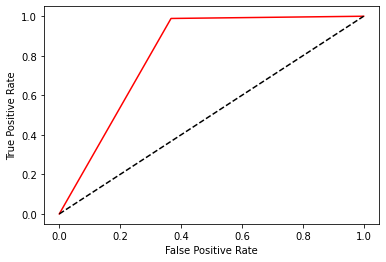

In [35]:
# Plotting of AUC
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [36]:
from pickle import dump
from pickle import load
dump(Model,open('Decision_Tree.sav', 'wb'))

In [38]:
loaded_model=load(open('Decision_Tree.sav' ,'rb'))
result = loaded_model.score(x_train,y_train)
print(result)

0.8180705119609135
